# K- Means Clustering

###### Adımlar
1. K değerini seç
2. Random Centroid ata
3. Data pointleri Centroid'e göre uzaklığa (öklid) bak ve cluster gruplama yap
4. Bu centroidlerin yeri değişmeyene kadar yeni centroid bul

K means Clustering bir Unsupervised Learninig algoritmasıdır. Yani artık sınıflandırma yaparken sınıf labelları yok ve biz bir kümeleme bir clustering işlemi uygulayacağız.

Elimizde bir veri seti var ve bu veri setinindeki dağılıma uygun birer centroid noktası seçeceğiz. K değerini kaç belirlediysek o kadar centroid noktası seçeceğiz. Ardından elimizde bulunan data noktalarını öklid kullanarak hangi centroid'e daha yakın oldduğnunu belirleyip ardından o noktalara göre data pointlerimizi belirleyeceğiz. Ardından her bir centroide olan uzaklıkların ortalamalarını alıp yeni bir centroid değeri bulup yine aynı işlemi uygulayacağız. Mesele bu noktada bazı data pointler centroid değişikliği yaşayabilir. Ardından en sonunda data centroidlerin ortalamları alınıp uzaklıklar hesaplandığında data pointlerin centroidleri değişmeyene kadar bu işlem tekrar edilir. Değişme olmadıktan sonra data pointler doğru bir şekilde sınıflandırılmış daha doğrusu kümelenmiş olur.

#### K- Means Evaluation

Değerlendirme:
    
    Yaptığımız gruplamanın en iyisi olup olmadığına karar verme sürecinde kullanılan metrik:
    
#### WCSS ----> Within Cluster Sum of Squares

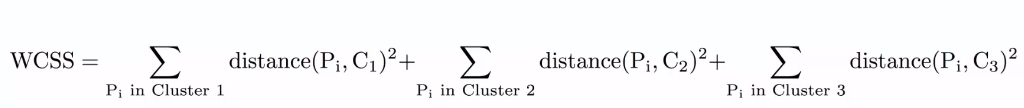

Bu formülde n cluster sayısı pi ise her cluster içindeki noktaların centroid'e olan uzaklığıdır.

WCSS ne kadar düşük olursa o kadar başarılı oluruz.

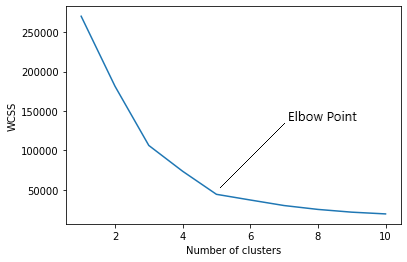

Şimdi eğer her bir noktayı centroid seçip WCSS'yi sıfır bulabiliriz fakat bu korkunç bir işlem yükü getirecektir. Bu sebeple K değerinin en optimize seçiminde elbow kuralı yani dirsek kuralı uygulanır. En optimize K değeri bu şekilde seçilir.

# K- Means with Python 

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

##### Create A dataset

In [28]:
#class 1
x1= np.random.normal(25,5,1000)
y1= np.random.normal(25,5,1000)

#class2 
x2= np.random.normal(55,5,1000)
y2= np.random.normal(60,5,1000)

#class3
x3= np.random.normal(55,5,1000)
y3= np.random.normal(15,5,1000)


In [29]:
x1

array([16.23959796, 20.02089746, 27.31505119, 22.86996801, 31.36973088,
       33.63054658, 25.4504006 , 32.88130357, 23.55510547, 22.014688  ,
       33.89502852, 21.61845252, 21.26300409, 24.92106297, 25.73305755,
       33.64535728, 17.59403308, 22.76253732, 26.01087158, 23.27988877,
       28.43965217, 26.05284685, 21.20872789, 25.12096076, 24.61703974,
       23.38375881, 22.90367522, 17.7940757 , 25.53712314, 26.15965749,
       27.04186931, 32.62832422, 19.93860628, 30.97178148, 22.52086992,
       22.76296664, 22.3824473 , 22.56887171, 19.7643816 , 24.67076914,
       24.4093438 , 26.4105539 , 14.92532244, 19.25771592, 21.47729304,
       24.85126998, 25.89297808, 24.68528733, 16.43750083, 26.90124937,
       24.46075377, 25.0308435 , 26.71263443, 33.80620253, 22.76367114,
       31.03595896, 25.7817292 , 32.92620389, 17.8259978 , 27.66583584,
       27.11452066, 25.60128009, 28.16966734, 33.53527983, 29.19638322,
       29.33662127, 24.40173816, 33.85172107, 29.95383456, 17.13

Bu üç farklı class değerini bir dictionary' de birleştirelim.

In [30]:
#x1 x2 ve x3'ü birleştirelim

x= np.concatenate((x1,x2,x2), axis=0)
y= np.concatenate((y1,y2,y3), axis=0)

dictionary= {"x" : x, "y": y}

In [31]:
data= pd.DataFrame(dictionary)

In [32]:
data.head()

,x,y
0,16.239598,21.972885
1,20.020897,20.924316
2,27.315051,26.073142
3,22.869968,24.775818
4,31.369731,28.750775


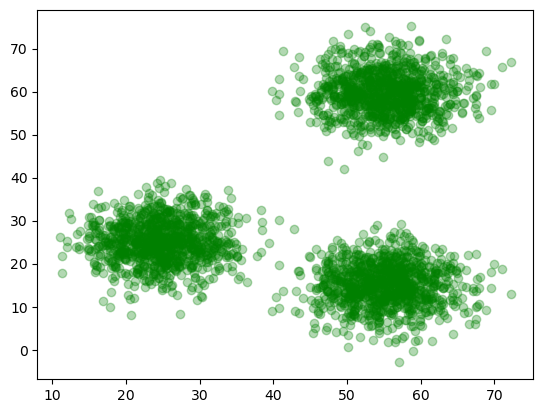

In [33]:
plt.scatter(x,y, color= "g", alpha=0.3)
plt.show()

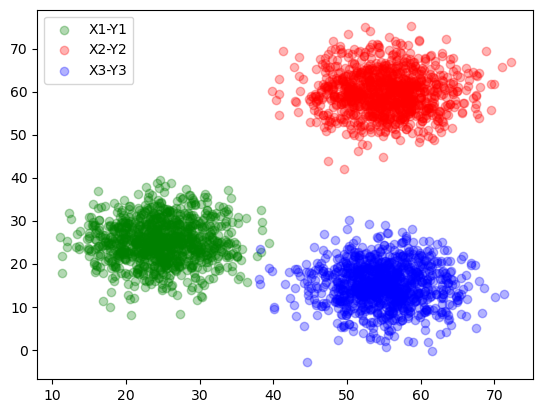

In [34]:
plt.scatter(x1,y1, color="g", alpha= 0.3, label= "X1-Y1")
plt.scatter(x2,y2, color= "r", alpha= 0.3, label= "X2-Y2")
plt.scatter(x3,y3, color="b", alpha= 0.3, label= "X3-Y3")
plt.legend()
plt.show()

Şimdi beraber bir WCSS listesi oluşturalım ve k değeri için 1-15 arasında bir for döngüsü açalım. En optime değer beklentim 3. Bakalım bize bu sonuç nasıl dönecek?

In [35]:
from sklearn.cluster import KMeans

In [36]:
wcss= []

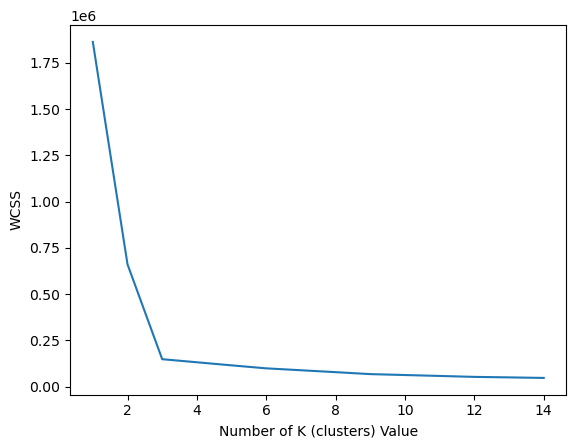

In [37]:
for k in range(1,15):
    
    kmeans= KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
    
plt.plot(range(1,15),wcss)
plt.xlabel("Number of K (clusters) Value")
plt.ylabel("WCSS")
plt.show()

###### En uygun K değerini bulduk. K=3 için Model Kurma

In [39]:
kmeans2= KMeans(n_clusters=3)
cluster= kmeans2.fit_predict(data)


In [48]:
type(cluster)

numpy.ndarray

In [53]:
unique_values = np.unique(cluster)

In [54]:
unique_values

array([0, 1, 2])

Label değerlerimin 0,1,2 olduğunu görebiliyoruz artık datamıza label sütunuda ekleyebliriz.

In [59]:
data["label"]= cluster

In [60]:
data.head()

,x,y,Label,label
0,16.239598,21.972885,2,2
1,20.020897,20.924316,2,2
2,27.315051,26.073142,2,2
3,22.869968,24.775818,2,2
4,31.369731,28.750775,2,2


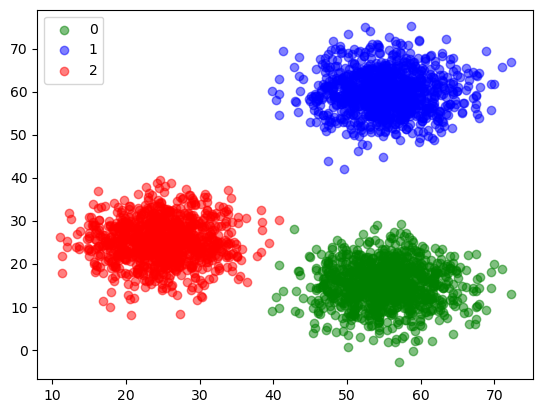

In [61]:
plt.scatter(data.x[data.label==0], data.y[data.label==0], color="green", label="0", alpha= 0.5)
plt.scatter(data.x[data.label==1], data.y[data.label==1], color="blue", label="1", alpha= 0.5)
plt.scatter(data.x[data.label==2], data.y[data.label==2], color="red", label="2", alpha= 0.5)
plt.legend()
plt.show()


#### Centroid

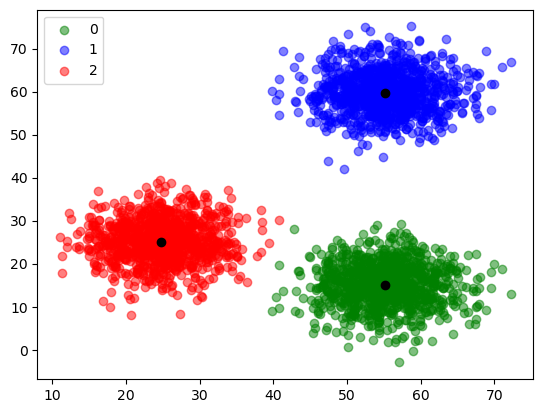

In [62]:
plt.scatter(data.x[data.label==0], data.y[data.label==0], color="green", label="0", alpha= 0.5)
plt.scatter(data.x[data.label==1], data.y[data.label==1], color="blue", label="1", alpha= 0.5)
plt.scatter(data.x[data.label==2], data.y[data.label==2], color="red", label="2", alpha= 0.5)
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1],color="black")
plt.legend()
plt.show()